In [2]:
%load_ext autoreload
%autoreload 2

In [32]:
import model
from data_utils.loader import Loader
from model.deconfounder import Deconfounder
from pyro.optim import Adam

In [161]:
data_path = "data/ohe_movies.csv"
loader = Loader(data_path)

In [163]:
X_train, X_test, y_train, y_test = loader.get_train_test()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

torch.Size([2544, 129]) torch.Size([637, 129]) torch.Size([2544]) torch.Size([637])


In [221]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np


'''
scaler = StandardScaler()
y_train_t = scaler.fit_transform(y_train.numpy().reshape(-1, 1))
y_test_t = scaler.transform(y_test.numpy().reshape(-1, 1))
'''

'''
y_train_t = np.log1p(y_train.numpy())
y_test_t = np.log1p(y_test.numpy())
'''

lr = LinearRegression()
lr.fit(X_train.numpy(), y_train.numpy())
y_pred = lr.predict(X_test.numpy())
mse = mean_squared_error(y_test.numpy(), y_pred)

y_mean = np.zeros(y_test.shape) + y_train.numpy().mean()
mean_mse = mean_squared_error(y_test.numpy(), y_mean)
print(f'Linear regression MSE: {mse:.4f}, mean baseline mse: {mean_mse:.4f}')

#log_mse = mean_squared_error(np.log1p(y_test.numpy()), np.log1p(y_pred))
#log_mean_mse = mean_squared_error(np.log1p(y_test.numpy()), np.log1p(y_mean))

Linear regression MSE: 1.8751, mean baseline mse: 1.9978


In [252]:
# linear conf
step1_opt = Adam({"lr": 0.0005})
step2_opt = Adam({"lr": 0.005})
# seed def = 3493204
deconfounder = Deconfounder(step1_opt, step2_opt, 
                            seed=5323,
                            step1_iters=4000, step2_iters=1500)

In [258]:
step1_opt = Adam({"lr": 0.0005})
step2_opt = Adam({"lr": 0.005})
# seed def = 3493204
deconfounder = Deconfounder(step1_opt, step2_opt, 
                            seed=532312,
                            step1_iters=4000, step2_iters=1500)

In [ ]:
step1_params, step2_params = deconfounder.train(X_train, y_train)


 Training Z marginal and W parameter marginal...
[iteration 0001] loss: 373.7842
[iteration 0101] loss: 356.5781
[iteration 0201] loss: 345.0149
[iteration 0301] loss: 330.6187
[iteration 0401] loss: 317.5551
[iteration 0501] loss: 299.4474
[iteration 0601] loss: 285.8005
[iteration 0701] loss: 277.6500
[iteration 0801] loss: 270.3279
[iteration 0901] loss: 254.1775
[iteration 1001] loss: 245.9535
[iteration 1101] loss: 232.0205
[iteration 1201] loss: 211.6004
[iteration 1301] loss: 186.9110
[iteration 1401] loss: 163.2103
[iteration 1501] loss: 127.3414
[iteration 1601] loss: 94.2169
[iteration 1701] loss: 72.7074
[iteration 1801] loss: 51.6712
[iteration 1901] loss: 41.6336
[iteration 2001] loss: 35.5446


In [254]:
#y_train_pred = deconfounder.do_predict(X_train)

y_test_pred, test_params = deconfounder.do_predict(X_test)
y_test_pred.shape


 Training Z marginal and W parameter marginal...
[iteration 0001] loss: 408.9000
[iteration 0101] loss: 344.3904
[iteration 0201] loss: 299.2797
[iteration 0301] loss: 247.8602
[iteration 0401] loss: 195.5766
[iteration 0501] loss: 169.1248
[iteration 0601] loss: 124.2977
[iteration 0701] loss: 102.3137
[iteration 0801] loss: 84.2746
[iteration 0901] loss: 70.4903
[iteration 1001] loss: 55.9531
[iteration 1101] loss: 47.4374
[iteration 1201] loss: 42.3070
[iteration 1301] loss: 37.0341
[iteration 1401] loss: 37.5920
[iteration 1501] loss: 30.2538
[iteration 1601] loss: 28.0426
[iteration 1701] loss: 28.2361
[iteration 1801] loss: 27.0281
[iteration 1901] loss: 25.0855
[iteration 2001] loss: 24.5502
[iteration 2101] loss: 24.1874
[iteration 2201] loss: 23.4275
[iteration 2301] loss: 22.0420
[iteration 2401] loss: 22.7443
[iteration 2501] loss: 22.3249
[iteration 2601] loss: 22.1210
[iteration 2701] loss: 21.1584
[iteration 2801] loss: 20.9867
[iteration 2901] loss: 21.1211
[iteration 3

(637,)

In [256]:
test_mse = mean_squared_error(y_test_pred, y_test.numpy())
test_mse

3.7400181272720987

In [257]:
y_cond_pred, test_params = deconfounder.cond_predict(X_test)
mean_squared_error(y_cond_pred, y_test.numpy())


 Training Z marginal and W parameter marginal...
[iteration 0001] loss: 442.6118
[iteration 0101] loss: 346.4260
[iteration 0201] loss: 283.6953
[iteration 0301] loss: 234.3771
[iteration 0401] loss: 173.3411
[iteration 0501] loss: 144.0910
[iteration 0601] loss: 107.2706
[iteration 0701] loss: 83.3440
[iteration 0801] loss: 74.8472
[iteration 0901] loss: 60.8635
[iteration 1001] loss: 53.4750
[iteration 1101] loss: 44.2212
[iteration 1201] loss: 38.7329
[iteration 1301] loss: 38.7154
[iteration 1401] loss: 32.4643
[iteration 1501] loss: 28.5246
[iteration 1601] loss: 27.1067
[iteration 1701] loss: 28.0701
[iteration 1801] loss: 25.7870
[iteration 1901] loss: 25.1365
[iteration 2001] loss: 25.5476
[iteration 2101] loss: 22.8494
[iteration 2201] loss: 24.8845
[iteration 2301] loss: 23.8407
[iteration 2401] loss: 23.6732
[iteration 2501] loss: 23.4872
[iteration 2601] loss: 22.6621
[iteration 2701] loss: 22.3990
[iteration 2801] loss: 21.2847
[iteration 2901] loss: 22.5259
[iteration 30

10.821833785344644

In [220]:
y_test.numpy().mean(), y_test_pred.mean(), np.log1p(y_test.numpy()).mean()

(17.842108, 16.698632555727613, 2.9332418)

In [213]:
from pyro.distributions import LogNormal, Normal
import torch


sigma = pyro.sample('sigma', Normal(test_params['sigma_mean0'], test_params['sigma_std0']))
sample_pred = pyro.sample('y', LogNormal(torch.tensor(y_test_pred), sigma))
print(sigma)
print(sample_pred.shape)
print(sample_pred.mean(), y_test.mean())
sample_pred

tensor(1.7868, grad_fn=<AddBackward0>)
torch.Size([637])
tensor(inf, dtype=torch.float64, grad_fn=<MeanBackward0>) tensor(17.8421)


tensor([1.6260e+237, 3.2365e+116, 5.1935e+126,  7.5498e+86, 2.2144e+133,
        9.3380e+244, 1.4581e+119, 3.1995e+144, 1.7227e+118, 1.6953e+187,
        6.2023e+229, 3.8847e+174, 1.6048e+170, 1.8075e+140, 3.5742e+165,
                inf, 1.4643e+210, 2.4524e+126,  7.4438e+89, 6.1682e+109,
        1.6977e+152, 2.2428e+127,  1.0606e+97, 8.3090e+112, 3.1795e+120,
        2.8491e+146,  1.1815e+99, 1.8629e+131,  2.3675e+82, 4.8126e+108,
        1.1510e+105,  2.6436e+78, 7.6972e+130,  7.0151e+93, 5.1604e+173,
        7.3023e+122,  8.6929e+98, 5.5848e+137, 7.3171e+104, 7.8438e+161,
        9.8399e+259, 2.9327e+123, 1.2188e+132,  2.9130e+89,  7.8759e+92,
        1.6856e+119, 1.5944e+105, 6.9432e+154, 3.4376e+138, 1.3141e+276,
        4.5518e+156, 3.2208e+121,  4.5948e+98, 3.3557e+122, 4.1300e+171,
        8.5265e+137, 6.3633e+147, 5.1670e+166, 1.5927e+121,  2.9160e+99,
        1.2034e+117,  6.5639e+89,  1.3140e+66,  7.3979e+68, 5.8397e+158,
        4.5837e+124, 3.9451e+149, 1.2577e+160, 4.04

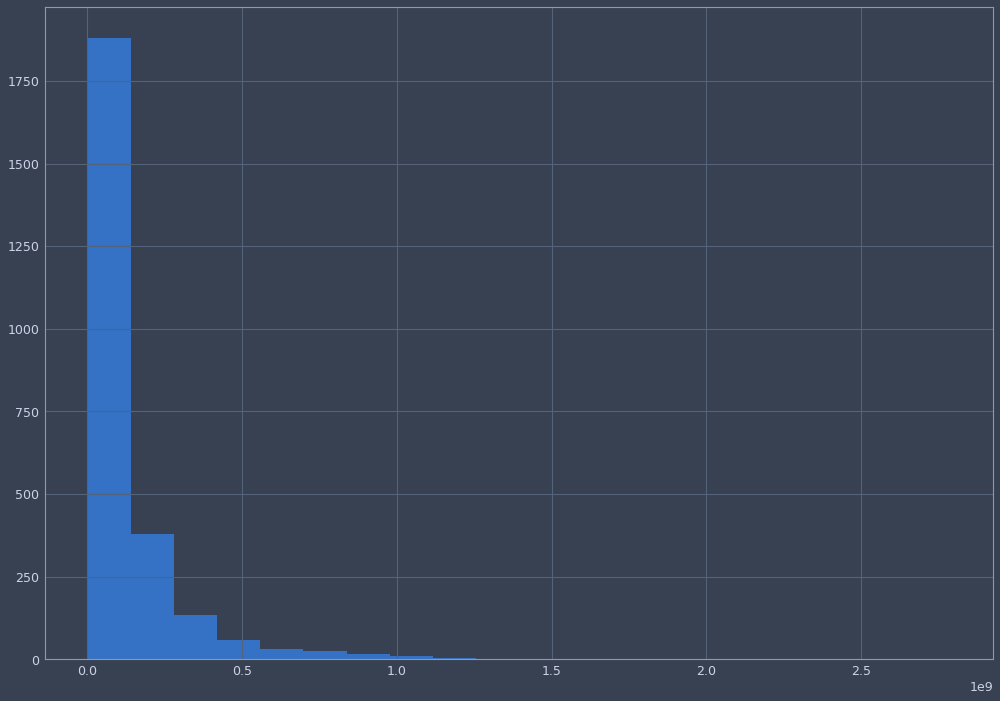

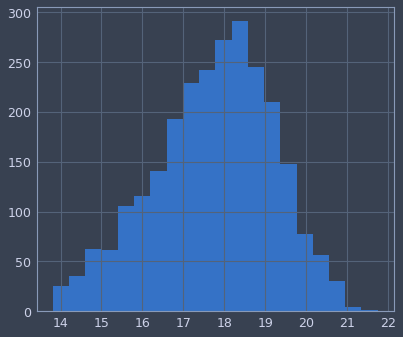

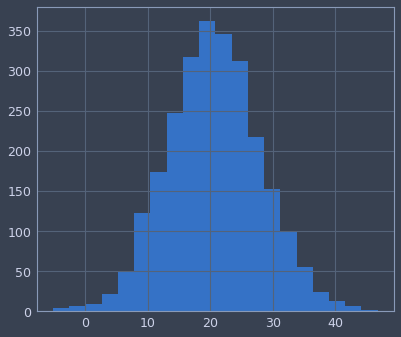

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

from jupyterthemes import jtplot
jtplot.style()

plt.figure(figsize=(17, 12))
plt.hist(y_train.numpy(), bins=20)
plt.show()

plt.hist(np.log1p(y_train.numpy()), bins=20)
plt.show()

plt.hist(predictor.detach().numpy(), bins=20)
plt.show()

In [146]:
predictor.mean(), np.log1p(y_train.numpy()).mean()

(16.082886050456594, 17.739586)

In [147]:
mean_squared_error(predictor, np.log1p(y_train.numpy()))

4.771761697495997